# Chat GPT Stick Figure Classification

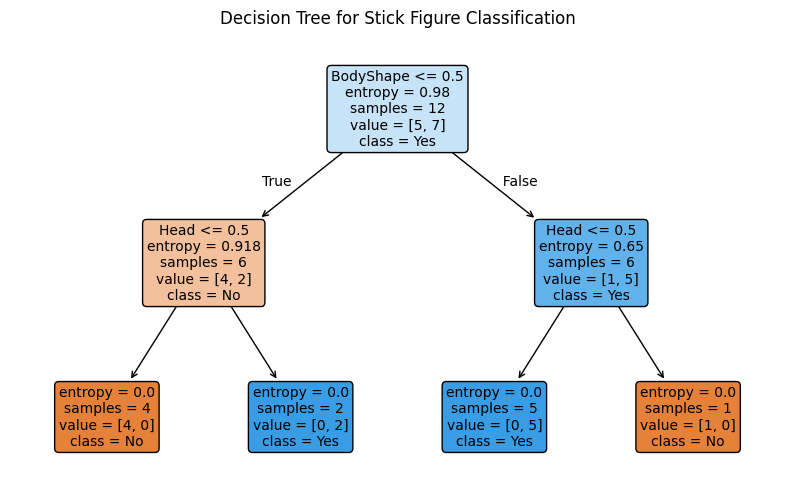

      Head  BodyShape  Color Decision Predicted
0   Square       Oval  White       No        No
1   Circle       Oval  Black      Yes       Yes
2   Square  Rectangle  White      Yes       Yes
3   Square  Rectangle  White      Yes       Yes
4   Square  Rectangle  White      Yes       Yes
5   Circle  Rectangle  Black       No        No
6   Square  Rectangle  White      Yes       Yes
7   Square       Oval  White       No        No
8   Square       Oval  White       No        No
9   Square  Rectangle  White      Yes       Yes
10  Square       Oval  White       No        No
11  Circle       Oval  White      Yes       Yes


In [2]:
# -----------------------------------------------------------
# Decision Tree Example: Stick Figure Classification
# Features:
#   1. Head shape (Square=0, Circle=1)
#   2. Body shape (Oval=0, Rectangle=1)
#   3. Body color (White=0, Black=1)
# Target:
#   Decision: No=0, Yes=1
# -----------------------------------------------------------

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# --- 1. Create dataset ------------------------------------
data = {
    "Head":      ["Square", "Circle", "Square", "Square", "Square", "Circle", "Square", "Square", "Square", "Square", "Square", "Circle"],
    "BodyShape": ["Oval",   "Oval",   "Rectangle", "Rectangle", "Rectangle", "Rectangle", "Rectangle", "Oval", "Oval", "Rectangle", "Oval", "Oval"],
    "Color":     ["White",  "Black",  "White", "White", "White", "Black", "White", "White", "White", "White", "White", "White"],
    "Decision":  ["No", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "No", "No", "Yes", "No", "Yes"]
}

df = pd.DataFrame(data)

# --- 2. Encode categorical variables ----------------------
# Convert strings to numeric codes for the classifier
df_encoded = df.copy()
df_encoded["Head"] = df["Head"].map({"Square": 0, "Circle": 1})
df_encoded["BodyShape"] = df["BodyShape"].map({"Oval": 0, "Rectangle": 1})
df_encoded["Color"] = df["Color"].map({"White": 0, "Black": 1})
df_encoded["Decision"] = df["Decision"].map({"No": 0, "Yes": 1})

# --- 3. Define features and target -------------------------
X = df_encoded[["Head", "BodyShape", "Color"]]
y = df_encoded["Decision"]

# --- 4. Train a Decision Tree ------------------------------
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(X, y)

# --- 5. Visualize the Decision Tree ------------------------
plt.figure(figsize=(10, 6))
plot_tree(
    clf,
    feature_names=["Head", "BodyShape", "Color"],
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Stick Figure Classification")
plt.show()

# --- 6. (Optional) Show dataset and predictions ------------
#df["Predicted"] = clf.predict(X).map({0: "No", 1: "Yes"})
#print(df)

# --- 6. (Optional) Show dataset and predictions ------------
df["Predicted"] = pd.Series(clf.predict(X)).map({0: "No", 1: "Yes"})
print(df)

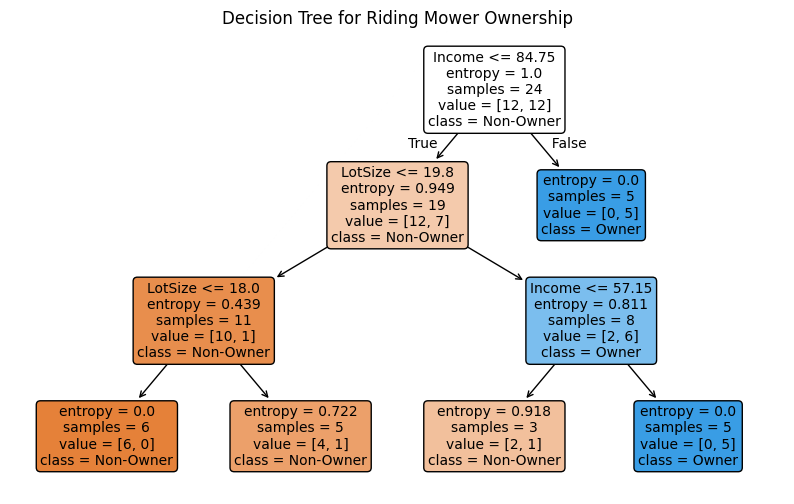

Feature Importances:
 Income     0.549787
LotSize    0.450213
dtype: float64


In [3]:
# -----------------------------------------------------------
# Decision Tree Classification: Riding Mower Ownership
# Dataset: Income ($000's), Lot Size (000's ft²), Ownership
# -----------------------------------------------------------

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# --- 1. Create dataset -------------------------------------
data = {
    "Household": list(range(1, 25)),
    "Income": [60, 85.5, 64.8, 61.5, 87, 110.1, 108, 82.8, 69, 93, 51, 81,
               75, 52.8, 64.8, 43.2, 84, 49.2, 59.4, 66, 47.4, 33, 51, 63],
    "LotSize": [18.4, 16.8, 21.6, 20.8, 23.6, 19.2, 17.6, 22.4, 20, 20.8, 22,
                20, 19.6, 20.8, 17.2, 20.4, 17.6, 17.6, 18.4, 18.4, 16.4, 18.8, 14, 14.8],
    "Ownership": [
        "Owner","Owner","Owner","Owner","Owner","Owner","Owner","Owner","Owner","Owner","Owner","Owner",
        "Non-Owner","Non-Owner","Non-Owner","Non-Owner","Non-Owner","Non-Owner","Non-Owner","Non-Owner",
        "Non-Owner","Non-Owner","Non-Owner","Non-Owner"
    ]
}

df = pd.DataFrame(data)

# --- 2. Encode target variable -----------------------------
df["Ownership"] = df["Ownership"].map({"Owner": 1, "Non-Owner": 0})

# --- 3. Define features and target --------------------------
X = df[["Income", "LotSize"]]
y = df["Ownership"]

# --- 4. Train Decision Tree -------------------------------
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
clf.fit(X, y)

# --- 5. Visualize the Decision Tree ------------------------
plt.figure(figsize=(10, 6))
plot_tree(
    clf,
    feature_names=["Income", "LotSize"],
    class_names=["Non-Owner", "Owner"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Riding Mower Ownership")
plt.show()

# --- 6. Show feature importance ----------------------------
importances = pd.Series(clf.feature_importances_, index=X.columns)
print("Feature Importances:\n", importances)